# The habitable zone of other worlds in the cosmos

In [1]:
### Running in Google Colab? You'll want to run this cell each time you start this notebook.

!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/HabitableWorlds/data/exoplanets_org_data_jun4_2021.csv


--2024-07-26 00:36:09--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/HabitableWorlds/data/exoplanets_org_data_jun4_2021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 615883 (601K) [text/plain]
Saving to: ‘exoplanets_org_data_jun4_2021.csv’

exoplanets_org_data 100%[===================>] 601.45K  --.-KB/s    in 0.02s   

2024-07-26 00:36:09 (29.5 MB/s) - ‘exoplanets_org_data_jun4_2021.csv’ saved [615883/615883]



## 0. GENERAL BACKGROUND


An exoplanet or extrasolar planet is a planet outside the Solar System. The first confirmation of detection occurred in 1992. As of 8 June 2020, there are 3262 confirmed exoplanets, with more than 700 systems having more than one planet. The discovery of exoplanets has intensified interest in the search for extraterrestrial life. There is special interest in planets that orbit in a star's habitable zone, where it is possible for liquid water, a prerequisite for life on Earth, to exist on the surface. The study of planetary habitability also considers a wide range of other factors in determining the suitability of a planet for hosting life. Rogue planets do not orbit any star. Such objects are considered as a separate category of planet. The rogue planets in the Milky Way possibly number in the billions or more.

## 1. INTRODUCTION AND DEFINITIONS

### Detection techniques



There are many methods of detecting exoplanets. Transit photometry and Doppler spectroscopy have found the most.

<img src="https://github.com/CIERA-Northwestern/REACHpy/blob/main/Projects/HabitableWorlds/Exoplanets_discovery_methods_chart.png?raw=1">

__Transit photometry__ is a phenomenon when a celestial body passes directly between a larger body and the observer. __Doppler spectroscopy__ is an indirect method for finding extrasolar planets from radial-velocity measurements via observation of Doppler shifts in the spectrum of the planet's parent star.

<img src="https://github.com/CIERA-Northwestern/REACHpy/blob/main/Projects/HabitableWorlds/radtrans.png?raw=1">

The transit probability is

#### $P_\mathrm{Transit}=\frac{R_\mathrm{*}}{A_\mathrm{Planet}(1-E^{2}_\mathrm{Planet})}\,,$

where $R_\mathrm{*}$ is the radius of the host star, $A_\mathrm{Planet}$ the planet semi-major axis, and $E_\mathrm{Planet}$ the planet eccentricity. The depth of the transit is

#### $D_\mathrm{Transit}=\left(\frac{R_\mathrm{planet}}{R_\mathrm{*}}\right)^2\,,$

where $R_\mathrm{planet}$ is the planet radius.

__EX. 1__ In the following, compute the probability and the depth of a transit. The current example is for a Jupiter-like planet orbiting a Sun-like star. Consider different masses for planets and stars. For determining planetary radii from planetary masses use the scaling relation

#### $R_\mathrm{planet}=(M_\mathrm{planet}/\mathrm{M_{\bigoplus}})^{0.485}\ R_{\bigoplus}\,,$

where $\mathrm{M_{\bigoplus}}$ and $\mathrm{R_{\bigoplus}}$ are the Earth's mass and radius. Use the scaling relation

#### $R_*=\begin{cases}
1.06\ {\rm R}_\odot\ (M_*/{\rm M}_\odot)^{0.945}& \text{$ M_*< 1.66\ \mathrm{M}_{\odot}$}\\
1.33\ {\rm R}_\odot\ (M_*/{\rm M}_\odot)^{0.555}& \text{$ M_*> 1.66\ \mathrm{M}_{\odot}$}
\end{cases}\,,$

for determining stellar radii from stellar masses. Tip: remember to convert the units.

In [2]:
M_earth = 5.972e27 # g
R_earth = 6.371e8 # cm
M_jupiter = 1.898e30 # g
M_sun = 1.989e33 # g
R_sun = 6.957e10 # cm
au = 1.496e+13 # au

def func_Rstar(Mstar): #Mstar in g
  if Mstar < 1.66*M_sun:
    Rstar = 1.06 * R_sun * (Mstar/M_sun)**0.945
  else:
    Rstar = 1.33 * R_sun * (Mstar/M_sun)**0.555
  return Rstar #in cm

def func_Rplanet(Mplanet): #Mplanet in g
  return (Mplanet/M_earth)**0.485 * R_earth #in cm

def func_Ptransit(Rstar, Aplanet, Eplanet): #Rstar and Aplanet in cm
  Ptransit = Rstar / (Aplanet * (1-Eplanet**2))
  return Ptransit

def func_Dtransit(Rplanet, Rstar): #Rplanet and Rstar in cm
  Dtransit = (Rplanet/Rstar)**2
  return Dtransit

In [3]:
M_planet = 1.*M_jupiter
M_star = 1*M_sun
A_planet = 5.*au
E_planet = 0.048775

print("Transit probability:", func_Ptransit(R_sun, A_planet, E_planet))
print("Depth of transit:", func_Dtransit(func_Rplanet(M_planet), R_sun))

Transit probability: 0.000932298151789537
Depth of transit: 0.022422411585785146


The shift in velocity due to the gravitational pull of the exoplanet is

#### $K=\sqrt{\frac{G}{A_\mathrm{Planet}(1-E^{2}_\mathrm{Planet})}} \frac{M_\mathrm{planet}\sin I}{M_\mathrm{*}^{1/2}}\,,$

where $G$ is the gravitational constant, $M_\mathrm{*}$ the mass of the host star, $M_\mathrm{planet}$ the mass of the planet, and $I$ the inclination of the system with respect to the observer.

__EX. 2__ In the following, compute the shift in velocity. The current example is for a Jupiter-like planet orbiting a Sun-like star. Consider different masses for planets and stars, using the scaling relations previously discussed. Tip: remember to convert the units.

In [4]:
import numpy as np
import astropy.constants as c
G = c.G.cgs.value
def func_K(Aplanet, Eplanet, Mplanet, Mstar, I):
  return (G/(Aplanet*(1-Eplanet**2)))**0.5 * Mplanet * np.sin(I)/ Mstar**0.5

func_K(A_planet, E_planet, M_planet, M_sun, np.pi/2) #cm/s

1272.7646021746464

__EX. 3__ Now, go to https://ssd.jpl.nasa.gov/?planet_phys_par and repeat the calculations for all the planets in our Solar System. Which has the largest probability for transits and/or radial velocity? Assume in the calculations $E_\mathrm{planet}=0$ and $I=90$ deg.

In [5]:
from numpy.lib import npyio
planet = ["Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto"]
Mplanet=[0.330114e27,4.86747e27,5.97237e27,0.641712e27,1898.187e27,568.3174e27,86.8127e27,102.4126e27,0.013030e27] # use lists
Aplanet=[0.3871,0.7233,1.000,1.5273,5.2028,9.5388,19.1914,30.0611,39.5294] # use lists

E_planet = 0
I = 90 * np.pi/180

# use a loop to compute and print the results for each planet

print("{0:10s}   {1:10s}   {2:10s}   {3:15s}".format("Planet","P_transit","D_transit","Velocity (cm/s)"))
print("-"*55)
for index in range(len(planet)):
    Ptransit = func_Ptransit(R_sun, Aplanet[index]*au, E_planet)
    Dtransit = func_Dtransit(func_Rplanet(Mplanet[index]), R_sun)
    K = func_K(Aplanet[index]*au, E_planet, Mplanet[index], M_sun, I)

    print("{0:10s}   {1:10.8f}   {2:10.8f}   {3:15.13f}".format(planet[index], Ptransit, Dtransit, K))

Planet       P_transit    D_transit    Velocity (cm/s)
-------------------------------------------------------
Mercury      0.01201344   0.00000506   0.7946429428491
Venus        0.00642942   0.00006877   8.5716360842687
Earth        0.00465040   0.00008387   8.9447123496638
Mars         0.00304485   0.00000964   0.7776741412326
Jupiter      0.00089383   0.02242455   1246.3502423170282
Saturn       0.00048752   0.00696127   275.5901904291943
Uranus       0.00024232   0.00112502   29.6790235512395
Neptune      0.00015470   0.00132062   27.9750345315184
Pluto        0.00011764   0.00000022   0.0031038732496


### The habitable zone

The circumstellar habitable zone, or simply the habitable zone, is the range of orbits around a star within which a planetary surface can support liquid water given sufficient atmospheric pressure.

<img src="https://github.com/CIERA-Northwestern/REACHpy/blob/main/Projects/HabitableWorlds/habitable_zone.png?raw=1">


The size and location of the habitable zone depends on the host star luminosity: the more luminous the host star, the further the habitable zone. The luminosity of a star is connected to its mass

#### $\frac{L}{L_\odot}=\left(\frac{M}{M_\odot}\right)^{3.5}\,,$

where $L_\odot$ and $M_\odot$ are the Sun's luminosity and mass, respectively.

The distance at which there is a given temperature due to the star's luminosity is

#### $r=\left(\frac{L}{4\pi\sigma T^4}\right)^{1/2}\,,$

where $\pi=3.1415$, $\sigma=3.31\times 10^{-12}$ L$_\odot$ AU$^{-2}$ K$^{-4}$ is the Stefen-Boltzmann constant, and $T$ is the temperature.

__EX. 4__ Assuming that water boils at $373$ K and freezes at $273$ K, compute the habitable zone for our solar system.


In [6]:
sigma = 3.31e-12

def func_L(M): #M in solar mass
  return M**3.5 # in Lsun

def func_r(L, T): #L in Lsun, T in K
  return (L/(4*np.pi*sigma*T**4))**0.5 #AU

print(func_r(1, 373), func_r(1, 273), 'AU')

1.1144572337261247 2.080442786983349 AU


The calculation of the expected temperature of a planet involves a couple of subtleties. One is __albedo__, which is the degree to which a planet or moon reflects light without absorbing it. Earth reflects about $37\%$ of light, whereas the Moon reflects only $12\%$. More reflection leads to a colder planet. Another issue is the __greenhouse effect__. If radiation is trapped then the planet heats up beyond the temperature it would normally acquire. An obvious example is that of Venus. Finally, the temperature can vary substantially over the surface of a planet, as it is obvious from a comparison between Death Valley and Antarctica. Atmospheres smooth out the difference (compare the Earth with the airless Moon, where the mean daytime temperature is $380$ K and the mean nighttime temperature is $120$ K). Therefore, a planet such as Earth can have both "habitable" and "uninhabitable" spots on it simultaneously.

__EX. 5__ Repeat __EX. 4__ for different substances. For example, you can find melting and boiling temperatures for some substances here https://www.engineeringtoolbox.com/melting-boiling-temperatures-d_390.html . Feel free to look for more.

In [7]:
substance = ['Water','Sulfuric Acid', 'Oxygen', 'Nitrogen']
Tmelt = [273, 283.46, 54.5, 63.2]
Tboil=[373, 610, 90.2, 77.3]

In [8]:
pi = 3.1415
sigma = 3.31e-12

def func_L(M): #M in solar mass
  return M**3.5 # in Lsun

def func_r(L, T): #L in Lsun, T in K
  return (L/(4*pi*sigma*T**4))**0.5 #AU

m_star = 1
for i in range(len(Tmelt)):
    rboil = func_r(func_L(m_star), Tboil[i])
    rmelt = func_r(func_L(m_star), Tmelt[i])
    print(f'To have liquid {substance[i]:>13s}, the range of distance for a '
          f'{m_star} solar mass star is {rboil:>5.2f} to {rmelt:>5.2f} AU.')

To have liquid         Water, the range of distance for a 1 solar mass star is  1.11 to  2.08 AU.
To have liquid Sulfuric Acid, the range of distance for a 1 solar mass star is  0.42 to  1.93 AU.
To have liquid        Oxygen, the range of distance for a 1 solar mass star is 19.06 to 52.20 AU.
To have liquid      Nitrogen, the range of distance for a 1 solar mass star is 25.95 to 38.82 AU.


__EX. 6__ Repeat __EX. 4__ and __EX. 5__ for different stellar masses, using the scaling relations provided above.

In [9]:
m_star = 0.2 # units = M_sun
for i in range(len(Tmelt)):
    rboil = func_r(func_L(m_star), Tboil[i])
    rmelt = func_r(func_L(m_star), Tmelt[i])
    print(f'To have liquid {substance[i]:>13s}, the range of distance for a '
          f'{m_star} solar mass star is {rboil:>4.2f} to {rmelt:>4.2f} AU.')

To have liquid         Water, the range of distance for a 0.2 solar mass star is 0.07 to 0.12 AU.
To have liquid Sulfuric Acid, the range of distance for a 0.2 solar mass star is 0.02 to 0.12 AU.
To have liquid        Oxygen, the range of distance for a 0.2 solar mass star is 1.14 to 3.12 AU.
To have liquid      Nitrogen, the range of distance for a 0.2 solar mass star is 1.55 to 2.32 AU.


In [10]:
m_star = 0.5 # units = M_sun
for i in range(len(Tmelt)):
    rboil = func_r(func_L(m_star), Tboil[i])
    rmelt = func_r(func_L(m_star), Tmelt[i])
    print(f'To have liquid {substance[i]:>13s}, the range of distance for a '
          f'{m_star} solar mass star is {rboil:>5.2f} to {rmelt:>5.2f} AU.')

To have liquid         Water, the range of distance for a 0.5 solar mass star is  0.33 to  0.62 AU.
To have liquid Sulfuric Acid, the range of distance for a 0.5 solar mass star is  0.12 to  0.57 AU.
To have liquid        Oxygen, the range of distance for a 0.5 solar mass star is  5.67 to 15.52 AU.
To have liquid      Nitrogen, the range of distance for a 0.5 solar mass star is  7.71 to 11.54 AU.


In [11]:
m_star = 2 # units = M_sun
for i in range(len(Tmelt)):
    rboil = func_r(func_L(m_star), Tboil[i])
    rmelt = func_r(func_L(m_star), Tmelt[i])
    print(f'To have liquid {substance[i]:>13s}, the range of distance for a '
          f'{m_star} solar mass star is {rboil:>6.2f} to {rmelt:>6.2f} AU.')

To have liquid         Water, the range of distance for a 2 solar mass star is   3.75 to   7.00 AU.
To have liquid Sulfuric Acid, the range of distance for a 2 solar mass star is   1.40 to   6.49 AU.
To have liquid        Oxygen, the range of distance for a 2 solar mass star is  64.10 to 175.59 AU.
To have liquid      Nitrogen, the range of distance for a 2 solar mass star is  87.28 to 130.57 AU.


In [12]:
m_star = 5 # units = M_sun
for i in range(len(Tmelt)):
    rboil = func_r(func_L(m_star), Tboil[i])
    rmelt = func_r(func_L(m_star), Tmelt[i])
    print(f'To have liquid {substance[i]:>13s}, the range of distance for a '
          f'{m_star} solar mass star is {rboil:>6.2f} to {rmelt:>6.2f} AU.')

To have liquid         Water, the range of distance for a 5 solar mass star is  18.63 to  34.78 AU.
To have liquid Sulfuric Acid, the range of distance for a 5 solar mass star is   6.97 to  32.26 AU.
To have liquid        Oxygen, the range of distance for a 5 solar mass star is 318.62 to 872.75 AU.
To have liquid      Nitrogen, the range of distance for a 5 solar mass star is 433.84 to 649.01 AU.


## 2. YOUR TURN TO DO RESEARCH!


### Exoplanets catalogs

As of 8 June 2020, there are 3262 confirmed exoplanets! About $1$ in $5$ Sun-like stars have an "Earth-sized" planet in the habitable zone. Assuming there are $200$ billion stars in the Milky Way, it can be hypothesized that there are $11$ billion potentially habitable Earth-sized planets in the Milky Way. Almost all of the planets detected so far are within the Milky Way. The nearest exoplanet is Proxima Centauri b, located $4.2$ light-years ($2.6\times 10^5$ AU) from Earth and orbiting Proxima Centauri, the closest star to the Sun.

There are various sources where to find a list of known and confirmed exoplantes, but probably the most complete and updated is __exoplanets.org__. Go to http://exoplanets.org/ .


<img src="https://github.com/CIERA-Northwestern/REACHpy/blob/main/Projects/HabitableWorlds/exoplanets_org.png?raw=1">

Selecting __Plots__, you can access a user-friendly interface where you can plot the measured characteristics of the exoplantes that have been found so far. You can also download the plots you produce and the relative data.


<img src="https://github.com/CIERA-Northwestern/REACHpy/blob/main/Projects/HabitableWorlds/plots.png?raw=1">

For example, I am plotting here the mass of the detected exoplanets versus their orbital semi-major axis. Tip: when plotting, it could be necessary to use the log-scale on one or both the axis.


<img src="https://github.com/CIERA-Northwestern/REACHpy/blob/main/Projects/HabitableWorlds/mass-sma.png?raw=1">

__EX. 7__ Produce 3 different plots, in http://exoplanets.org/ . Download them for your personal reference.

__EX. 8__ Look at a data tables for known exoplanets and repeat __EX. 1__, __EX. 2__, __EX. 4__, __EX. 5__ for some of them. Tip: create a file to read, and use a loop.


<img src="https://github.com/CIERA-Northwestern/REACHpy/blob/s2024/Projects/HabitableWorlds/table.png?raw=1">

In [13]:
# Remove comment command to view preview of file
#!cat exoplanets_org_data_jun4_2021.csv

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import matplotlib as mpl
from matplotlib import colormaps
import numpy as np
import pandas

# create table
data = pandas.read_csv('exoplanets_org_data_jun4_2021.csv', skiprows=[1])
data

,NAME,MSINI,A,PER,ECC,OM,T0,K,ORBREF,ORBURL,FIRSTREF,FIRSTURL,MASS,MSTAR,I
0,Kepler-107 d,NaN,0.078010,7.958203,NaN,90.000,2.454971e+06,NaN,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,0.003712,NaN,NaN
1,Kepler-1049 b,NaN,0.034472,3.273461,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.002453,0.51,NaN
2,Kepler-813 b,NaN,0.137610,19.129473,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015970,0.95,NaN
3,Kepler-427 b,0.310432,0.091351,10.290994,0.000000,90.000,2.454970e+06,29.8000,Hebrard 2014,http://adsabs.harvard.edu/abs/2014A%26A...572A...,Borucki 2010,http://adsabs.harvard.edu/abs/2010Sci...327..977B,0.290000,0.96,89.5
4,Kepler-1056 b,NaN,0.185149,27.495606,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.027126,1.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,Kepler-1529 b,NaN,0.055729,5.339057,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015575,0.81,NaN
3258,Kepler-1446 b,NaN,0.014245,0.689968,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.001430,0.81,NaN
3259,upsilon And d,4.115820,2.524520,1278.121800,0.267395,269.685,2.453938e+06,66.6805,Wright 2009,http://adsabs.harvard.edu/abs/2009ApJ...693.1084W,Butler 1999,http://adsabs.harvard.edu/abs/1999ApJ...526..916B,4.115820,1.31,NaN
3260,Kepler-1098 b,NaN,0.036340,2.543073,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.007307,0.99,NaN


In [15]:
bad = (data["MASS"] == 0)|(data["A"] == 0)
data = data.drop(np.where(bad)[0])
data

,NAME,MSINI,A,PER,ECC,OM,T0,K,ORBREF,ORBURL,FIRSTREF,FIRSTURL,MASS,MSTAR,I
0,Kepler-107 d,NaN,0.078010,7.958203,NaN,90.000,2.454971e+06,NaN,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,0.003712,NaN,NaN
1,Kepler-1049 b,NaN,0.034472,3.273461,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.002453,0.51,NaN
2,Kepler-813 b,NaN,0.137610,19.129473,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015970,0.95,NaN
3,Kepler-427 b,0.310432,0.091351,10.290994,0.000000,90.000,2.454970e+06,29.8000,Hebrard 2014,http://adsabs.harvard.edu/abs/2014A%26A...572A...,Borucki 2010,http://adsabs.harvard.edu/abs/2010Sci...327..977B,0.290000,0.96,89.5
4,Kepler-1056 b,NaN,0.185149,27.495606,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.027126,1.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Kepler-354 c,NaN,0.129058,16.934402,NaN,90.000,2.454970e+06,NaN,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,0.007495,NaN,NaN
3257,Kepler-1529 b,NaN,0.055729,5.339057,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015575,0.81,NaN
3258,Kepler-1446 b,NaN,0.014245,0.689968,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.001430,0.81,NaN
3259,upsilon And d,4.115820,2.524520,1278.121800,0.267395,269.685,2.453938e+06,66.6805,Wright 2009,http://adsabs.harvard.edu/abs/2009ApJ...693.1084W,Butler 1999,http://adsabs.harvard.edu/abs/1999ApJ...526..916B,4.115820,1.31,NaN


In [16]:
# loop and print results
data["R_planet"] = func_Rplanet(data["MASS"]*M_jupiter)
data["R_star"] = np.array([func_Rstar(Mstar*M_sun) for Mstar in data['MSTAR']])

data["Ptransit"] = func_Ptransit(data["R_star"], data['A']*au, data['ECC'])
data["Dtransit"] = func_Dtransit(data["R_planet"], data["R_star"])
data["K"] = func_K(data['A']*au, data['ECC'], data["MASS"]*M_jupiter, data['MSTAR']*M_sun, data['I']/180*np.pi)
data

,NAME,MSINI,A,PER,ECC,OM,T0,K,ORBREF,ORBURL,FIRSTREF,FIRSTURL,MASS,MSTAR,I,R_planet,R_star,Ptransit,Dtransit
0,Kepler-107 d,NaN,0.078010,7.958203,NaN,90.000,2.454971e+06,NaN,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,0.003712,NaN,NaN,6.903071e+08,NaN,NaN,NaN
1,Kepler-1049 b,NaN,0.034472,3.273461,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.002453,0.51,NaN,5.646433e+08,3.902848e+10,0.075680,0.000209
2,Kepler-813 b,NaN,0.137610,19.129473,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015970,0.95,NaN,1.400755e+09,7.025491e+10,0.034127,0.000398
3,Kepler-427 b,0.310432,0.091351,10.290994,0.000000,90.000,2.454970e+06,2783.588753,Hebrard 2014,http://adsabs.harvard.edu/abs/2014A%26A...572A...,Borucki 2010,http://adsabs.harvard.edu/abs/2010Sci...327..977B,0.290000,0.96,89.5,5.715131e+09,7.095356e+10,0.051919,0.006488
4,Kepler-1056 b,NaN,0.185149,27.495606,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.027126,1.12,NaN,1.811157e+09,8.208029e+10,0.029634,0.000487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Kepler-354 c,NaN,0.129058,16.934402,NaN,90.000,2.454970e+06,NaN,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,0.007495,NaN,NaN,9.705737e+08,NaN,NaN,NaN
3257,Kepler-1529 b,NaN,0.055729,5.339057,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015575,0.81,NaN,1.383873e+09,6.042911e+10,0.072483,0.000524
3258,Kepler-1446 b,NaN,0.014245,0.689968,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.001430,0.81,NaN,4.345908e+08,6.042911e+10,0.283571,0.000052
3259,upsilon And d,4.115820,2.524520,1278.121800,0.267395,269.685,2.453938e+06,NaN,Wright 2009,http://adsabs.harvard.edu/abs/2009ApJ...693.1084W,Butler 1999,http://adsabs.harvard.edu/abs/1999ApJ...526..916B,4.115820,1.31,NaN,2.069067e+10,9.518078e+10,0.002714,0.047255


Text(0.5, 1.0, 'All Planets')

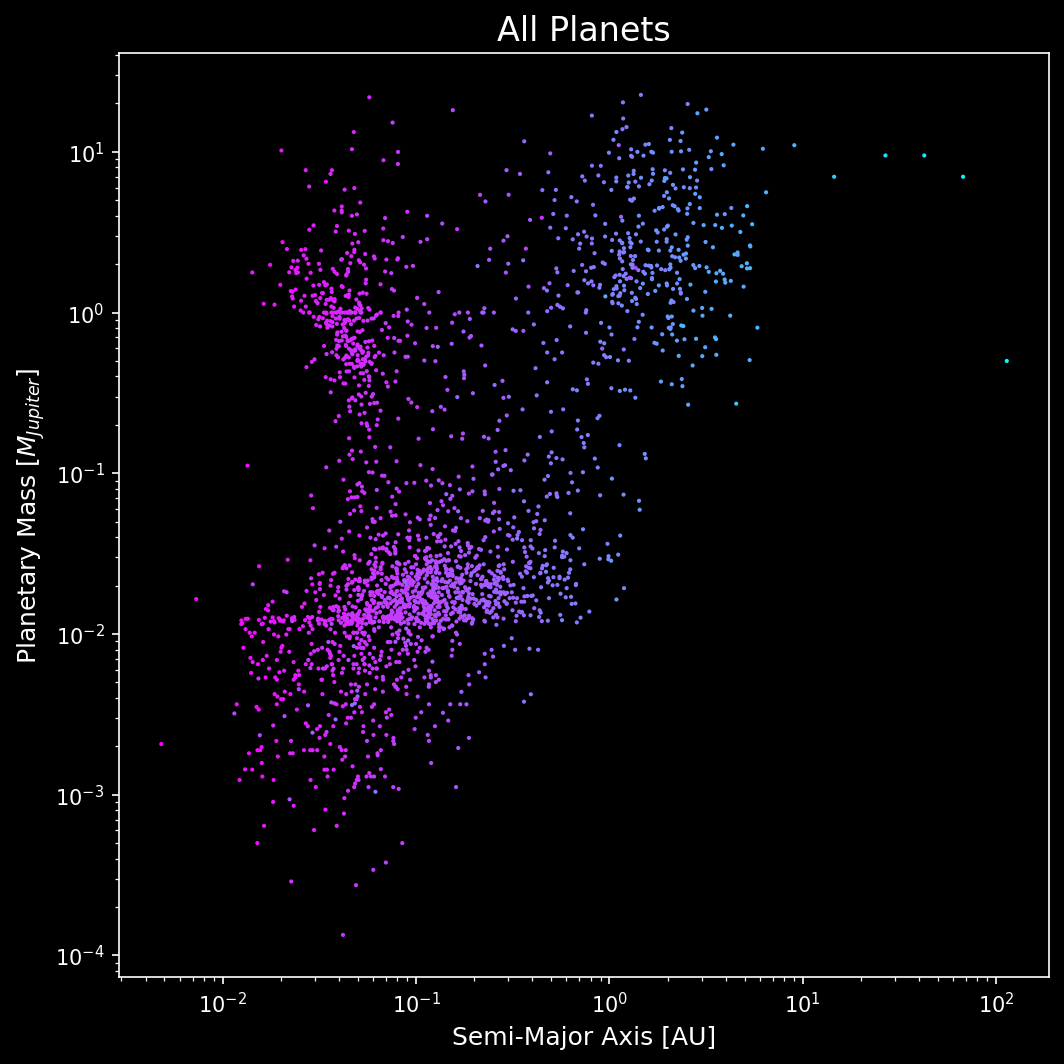

In [33]:
# plot results
plt.figure(figsize=(8,8), dpi = 150)
plt.style.use('dark_background')
cm = colormaps['cool']
plt.scatter(data["A"], data["MASS"], s=1, c=np.log10(data["Ptransit"]), cmap=cm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis [AU]', fontsize=12)
plt.ylabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
plt.title('All Planets', fontsize=16)

Giordano Bruno, who was an Italian philosopher, was burnt alive for suggesting that there are many other worlds out there (https://en.wikipedia.org/wiki/Giordano_Bruno). Nowadays, we know for sure there is plenty of exoplanets in the Universe. The question whether they can host and sustain life has enormous social, ethical, and religious implications. From a purely scientific point of view, we can only estimate how many exoplanets can host life, as we know it.

#### 1) How many of the currently known exoplanets are in the habitable zone?

In [18]:
#Pick water habitable zone
data['r_in'] = func_r(func_L(data['MSTAR']), 373)
data['r_out'] = func_r(func_L(data['MSTAR']), 273)

good = (data['r_in'] < data['A'])&(data['A'] < data['r_out'])
np.sum(good)

117

In [19]:
data

,NAME,MSINI,A,PER,ECC,OM,T0,K,ORBREF,ORBURL,...,FIRSTURL,MASS,MSTAR,I,R_planet,R_star,Ptransit,Dtransit,r_in,r_out
0,Kepler-107 d,NaN,0.078010,7.958203,NaN,90.000,2.454971e+06,NaN,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,...,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,0.003712,NaN,NaN,6.903071e+08,NaN,NaN,NaN,NaN,NaN
1,Kepler-1049 b,NaN,0.034472,3.273461,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.002453,0.51,NaN,5.646433e+08,3.902848e+10,0.075680,0.000209,0.343019,0.640339
2,Kepler-813 b,NaN,0.137610,19.129473,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015970,0.95,NaN,1.400755e+09,7.025491e+10,0.034127,0.000398,1.018793,1.901860
3,Kepler-427 b,0.310432,0.091351,10.290994,0.000000,90.000,2.454970e+06,2783.588753,Hebrard 2014,http://adsabs.harvard.edu/abs/2014A%26A...572A...,...,http://adsabs.harvard.edu/abs/2010Sci...327..977B,0.290000,0.96,89.5,5.715131e+09,7.095356e+10,0.051919,0.006488,1.037635,1.937032
4,Kepler-1056 b,NaN,0.185149,27.495606,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.027126,1.12,NaN,1.811157e+09,8.208029e+10,0.029634,0.000487,1.358943,2.536844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Kepler-354 c,NaN,0.129058,16.934402,NaN,90.000,2.454970e+06,NaN,Rowe 2014,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,...,http://adsabs.harvard.edu/abs/2014arXiv1402.6534R,0.007495,NaN,NaN,9.705737e+08,NaN,NaN,NaN,NaN,NaN
3257,Kepler-1529 b,NaN,0.055729,5.339057,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015575,0.81,NaN,1.383873e+09,6.042911e+10,0.072483,0.000524,0.770759,1.438835
3258,Kepler-1446 b,NaN,0.014245,0.689968,0.000000,90.000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.001430,0.81,NaN,4.345908e+08,6.042911e+10,0.283571,0.000052,0.770759,1.438835
3259,upsilon And d,4.115820,2.524520,1278.121800,0.267395,269.685,2.453938e+06,NaN,Wright 2009,http://adsabs.harvard.edu/abs/2009ApJ...693.1084W,...,http://adsabs.harvard.edu/abs/1999ApJ...526..916B,4.115820,1.31,NaN,2.069067e+10,9.518078e+10,0.002714,0.047255,1.787700,3.337236


In [20]:
good_df = data[(data['r_in'] <= data['A'])&(data['A'] <= data['r_out'])]
good_df

,NAME,MSINI,A,PER,ECC,OM,T0,K,ORBREF,ORBURL,...,FIRSTURL,MASS,MSTAR,I,R_planet,R_star,Ptransit,Dtransit,r_in,r_out
91,HD 141937 b,9.475200,1.500870,653.21997,0.410000,187.720,2.451847e+06,NaN,Udry 2002,http://adsabs.harvard.edu/abs/2002A%26A...390....,...,http://adsabs.harvard.edu/abs/2002A%26A...390....,9.475200,1.048,NaN,3.100334e+10,7.708489e+10,0.004127,0.161763,1.209768,2.258367
116,HD 132406 b,5.604950,1.982270,974.00000,0.340000,214.000,2.453474e+06,NaN,Da Silva 2007,http://adsabs.harvard.edu/abs/2007A%26A...473....,...,http://adsabs.harvard.edu/abs/2007A%26A...473....,5.604950,1.090,NaN,2.403369e+10,8.000109e+10,0.003050,0.090250,1.295884,2.419126
138,HD 126614 A b,0.385706,2.368470,1244.00000,0.410000,243.000,2.453808e+06,NaN,Howard 2010,http://adsabs.harvard.edu/abs/2010ApJ...721.1467H,...,http://adsabs.harvard.edu/abs/2010ApJ...721.1467H,0.385706,1.145,NaN,6.562926e+09,8.381062e+10,0.002843,0.006132,1.412471,2.636767
175,HD 145934 b,2.283820,4.606900,2730.00000,0.053000,215.000,2.451430e+06,NaN,Feng 2015,http://adsabs.harvard.edu/abs/2015ApJ...800...22F,...,http://adsabs.harvard.edu/abs/2015ApJ...800...22F,2.283820,1.748,NaN,1.554942e+10,1.261491e+11,0.001836,0.015194,2.961538,5.528530
184,HD 147513 b,1.179650,1.309580,528.40002,0.260000,282.000,2.451123e+06,NaN,Mayor 2004,http://adsabs.harvard.edu/abs/2004A%26A...415....,...,http://adsabs.harvard.edu/abs/2004A%26A...415....,1.179650,1.072,NaN,1.128661e+10,7.875206e+10,0.004311,0.020540,1.258667,2.349649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,GJ 3293 c,0.066875,0.361757,122.61917,0.117135,314.760,2.455934e+06,NaN,Astudillo-Defru 2015 (corrected; private commu...,http://adsabs.harvard.edu/abs/2015A%26A...575A...,...,http://adsabs.harvard.edu/abs/2015A%26A...575A...,0.066875,0.420,NaN,2.805540e+09,3.248617e+10,0.006086,0.007458,0.244206,0.455878
3142,Kepler-441 b,NaN,0.568939,207.24820,0.000000,90.000,2.455668e+06,60.678657,Torres 2015,http://adsabs.harvard.edu/abs/2015ApJ...800...99T,...,http://adsabs.harvard.edu/abs/2010Sci...327..977B,0.012177,0.572,89.97,1.228161e+09,4.349778e+10,0.005111,0.000797,0.419288,0.782718
3167,BD +49 828 b,1.574190,4.245190,2590.00000,0.350000,170.000,2.455470e+06,NaN,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,...,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,1.574190,1.520,NaN,1.298183e+10,1.095393e+11,0.001966,0.014045,2.318975,4.329009
3240,HD 171028 b,1.988090,1.318950,550.00000,0.590000,304.000,2.454187e+06,NaN,Santos 2011,http://adsabs.harvard.edu/abs/2011A%26A...526A...,...,http://adsabs.harvard.edu/abs/2007A%26A...474....,1.988090,1.010,NaN,1.453800e+10,7.444089e+10,0.005787,0.038140,1.134050,2.117018


#### 2) Are there particular planetary properties that tend to be in the habitable zone?

Text(0.5, 1.0, 'Water Habitable Zone')

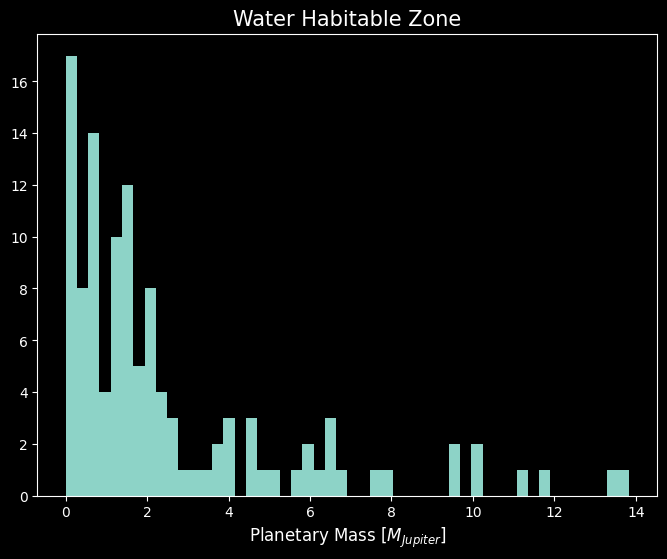

In [39]:
plt.figure(figsize=(8,6))
plt.hist(good_df['MASS'], bins = 50)
plt.xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
plt.title('Water Habitable Zone', fontsize=15)

Text(0.5, 1.0, 'Water Habitable Zone')

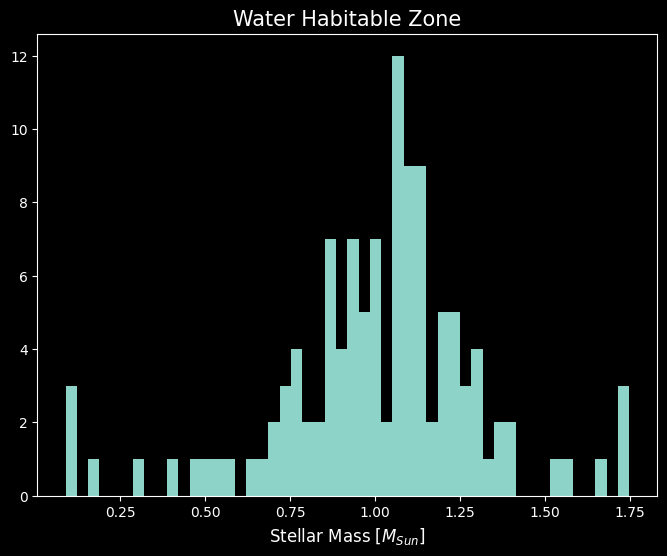

In [40]:
plt.figure(figsize=(8,6))
plt.hist(good_df['MSTAR'], bins = 50)
plt.xlabel('Stellar Mass [$M_{Sun}$]', fontsize=12)
plt.title('Water Habitable Zone', fontsize=15)

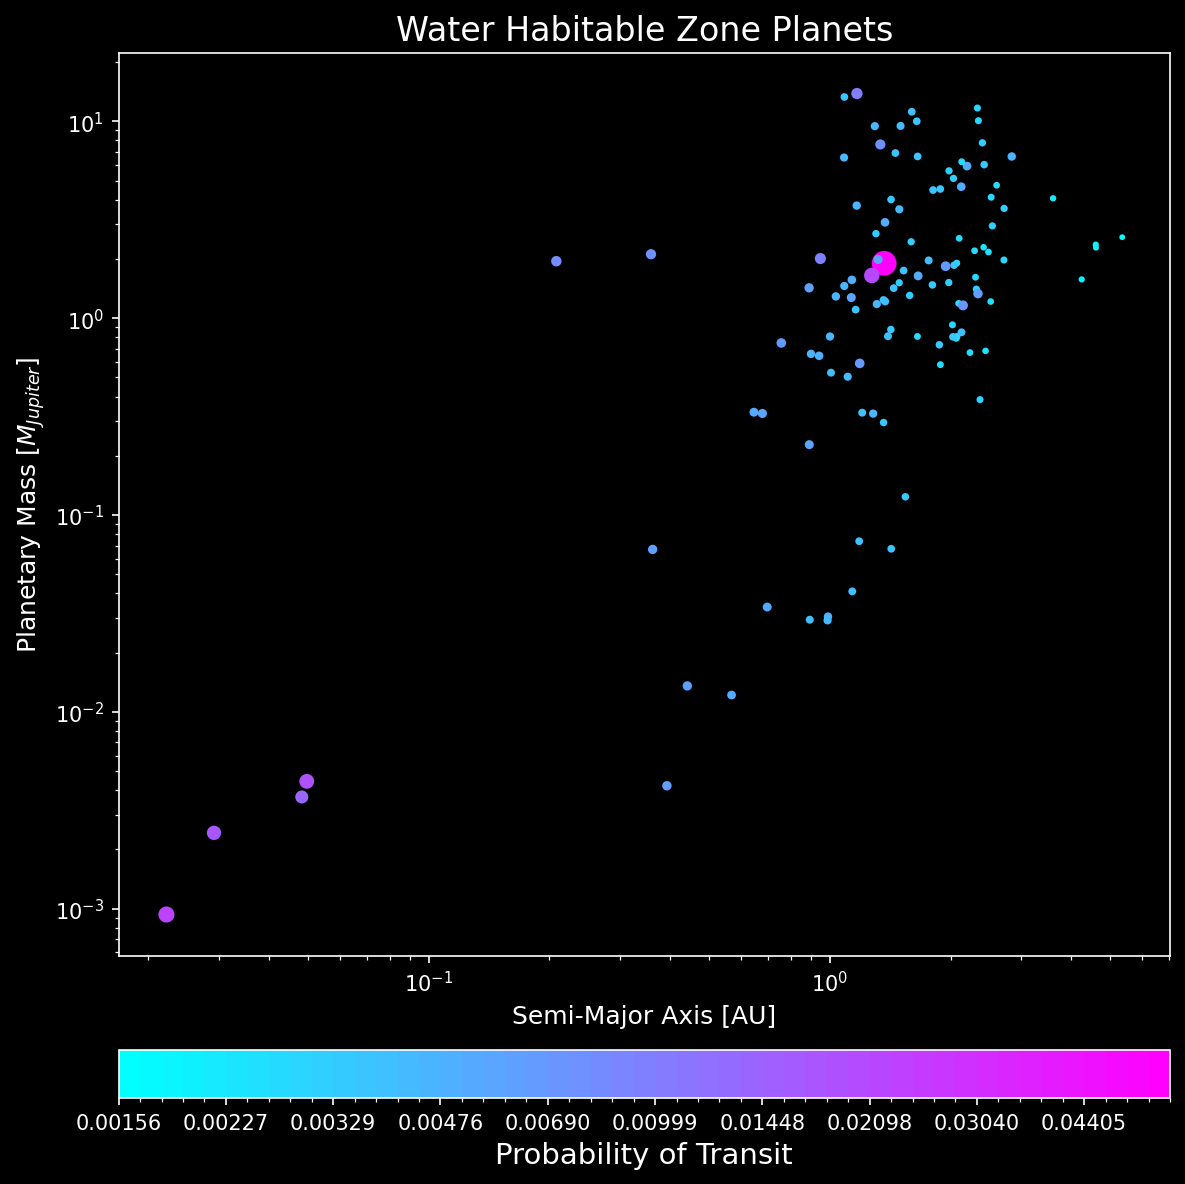

In [23]:
plt.figure(figsize=(8,8), dpi = 150)
cm = colormaps['cool']
ax1 = plt.subplot2grid((8, 10), (0,0), rowspan=7, colspan=10)
ax1.scatter(good_df["A"], good_df["MASS"], s=2*10**3*good_df['Ptransit'],
            c=np.log10(good_df["Ptransit"]), cmap = cm)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Semi-Major Axis [AU]', fontsize=12)
ax1.set_ylabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
ax1.set_title('Water Habitable Zone Planets', fontsize=16)

ax2 = plt.subplot2grid((8, 10), (7, 0), rowspan=1, colspan=10)
minP = np.log10(good_df["Ptransit"].min())
maxP = np.log10(good_df["Ptransit"].max())
bounds = np.logspace(minP, maxP)
# set boundaries
N = len(good_df["Ptransit"])
norm = mpl.colors.BoundaryNorm(bounds, cm.N)
cb = mpl.colorbar.Colorbar(ax2,
                            cmap=cm,
                            spacing='uniform',
                            orientation ='horizontal',
                            boundaries = bounds,
                            norm = norm)
ax2.set_xlabel('Probability of Transit', fontsize=14)

plt.tight_layout()

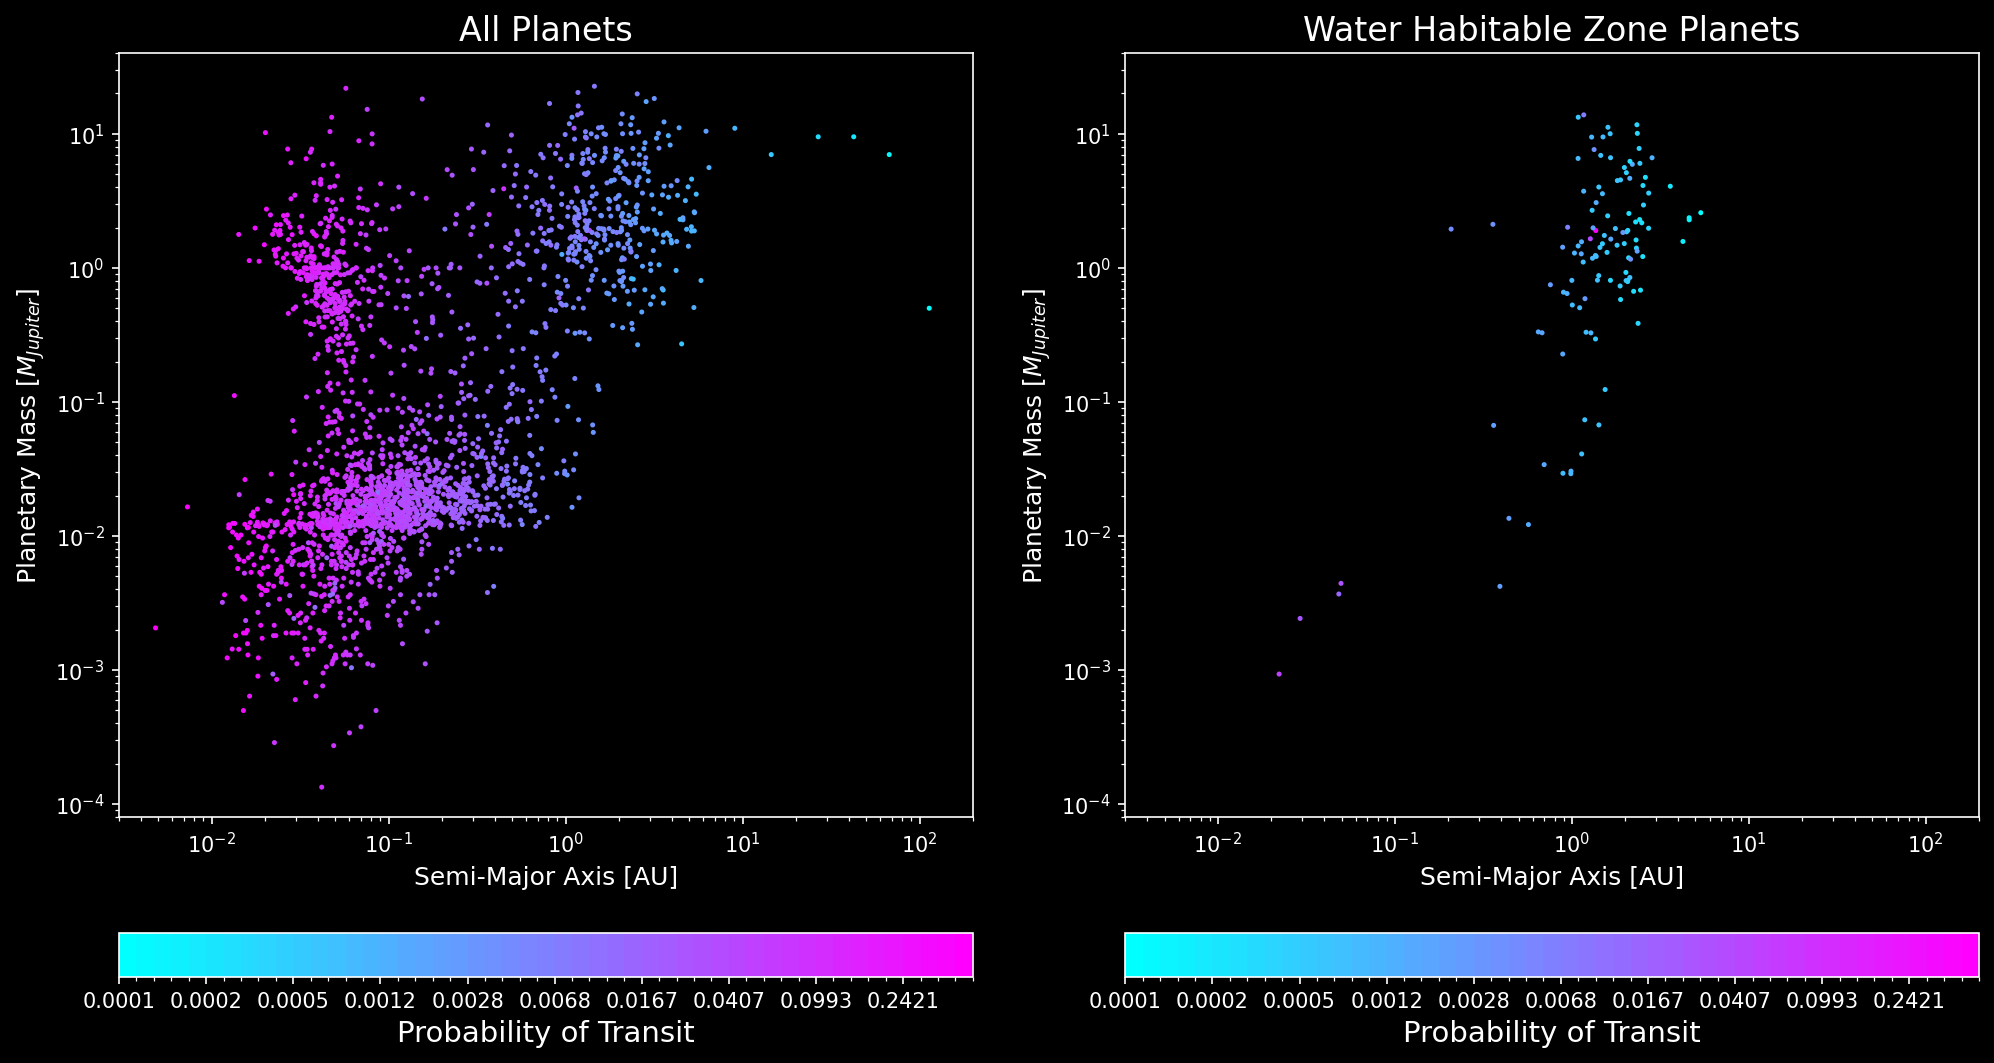

In [24]:
plt.figure(figsize=(16,8), dpi = 150)
cm = colormaps['cool']
ax1 = plt.subplot2grid((12, 21), (0,0), rowspan=10, colspan=10)
ax1.scatter(data["A"], data["MASS"], s=2, c=np.log10(data["Ptransit"]), cmap = cm)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Semi-Major Axis [AU]', fontsize=12)
ax1.set_ylabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
ax1.set_title('All Planets', fontsize=16)
ax1.set_xlim(3e-3, 2e2)
ax1.set_ylim(8e-5, 4e1)

ax3 = plt.subplot2grid((12, 21), (0,11), rowspan=10, colspan=10)
ax3.scatter(good_df["A"], good_df["MASS"], s=2, c=np.log10(good_df["Ptransit"]), cmap = cm)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('Semi-Major Axis [AU]', fontsize=12)
ax3.set_ylabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
ax3.set_title('Water Habitable Zone Planets', fontsize=16)
ax3.set_xlim(3e-3, 2e2)
ax3.set_ylim(8e-5, 4e1)

ax2 = plt.subplot2grid((12, 21), (11, 0), rowspan=1, colspan=10)
minP = np.log10(data["Ptransit"].min())
maxP = np.log10(data["Ptransit"].max())
bounds = np.logspace(minP, maxP)
# set boundaries
N = len(data["Ptransit"])
norm = mpl.colors.BoundaryNorm(bounds, cm.N)
cb = mpl.colorbar.Colorbar(ax2,
                            cmap=cm,
                            spacing='uniform',
                            orientation ='horizontal',
                            boundaries = bounds,
                            norm = norm)
ax2.set_xlabel('Probability of Transit', fontsize=14)

ax4 = plt.subplot2grid((12, 21), (11, 11), rowspan=1, colspan=10)
minP_ax4 = np.log10(good_df["Ptransit"].min())
maxP_ax4 = np.log10(good_df["Ptransit"].max())
bounds_ax4 = np.logspace(minP_ax4, maxP_ax4)
# set boundaries
N_ax4 = len(good_df["Ptransit"])
norm_ax4 = mpl.colors.BoundaryNorm(bounds, cm.N)
cb = mpl.colorbar.Colorbar(ax4,
                           cmap=cm,
                           spacing='uniform',
                           orientation ='horizontal',
                           boundaries = bounds_ax4,
                           norm = norm_ax4)
ax4.set_xlabel('Probability of Transit', fontsize=14)
plt.subplots_adjust(wspace=2, hspace=0.8)

Imagine now that water or oxygen are not necessary to sustain life for some living beings. You can find some simple explanation here https://biologydictionary.net/anaerobic-organism/.

#### 3) Which kind of metabolisms can be sustained without oxygen?

Sulfuric acid

#### 4) Which exoplanets could sustain the growth of anaerobic organisms?

In [25]:
print(substance)
print(Tboil)
print(Tmelt)

['Water', 'Sulfuric Acid', 'Oxygen', 'Nitrogen']
[373, 610, 90.2, 77.3]
[273, 283.46, 54.5, 63.2]


In [26]:
#Pick water habitable zone
sf_r_boil = func_r(func_L(data['MSTAR']), Tboil[1])
sf_r_melt = func_r(func_L(data['MSTAR']), Tmelt[1])

sf_good = (sf_r_boil < data['A'])&(sf_r_melt > data['A']) #sf_good: sulfur good
np.sum(sf_good)

436

In [27]:
sf_good_df = data[(sf_r_boil < data['A'])&(sf_r_melt > data['A'])]
sf_good_df

,NAME,MSINI,A,PER,ECC,OM,T0,K,ORBREF,ORBURL,...,FIRSTURL,MASS,MSTAR,I,R_planet,R_star,Ptransit,Dtransit,r_in,r_out
11,GJ 625 b,0.008929,0.078362,14.628000,0.130000,343.10000,NaN,NaN,Suarez Mascareno 2017,http://adsabs.harvard.edu/abs/2017A%26A...605A...,...,http://adsabs.harvard.edu/abs/2017A%26A...605A...,0.008929,0.3000,NaN,1.056609e+09,2.363782e+10,0.020510,0.001998,0.135529,0.253002
13,Kepler-1599 b,NaN,0.480750,122.363553,0.000000,90.00000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.012082,0.9900,NaN,1.223495e+09,7.304712e+10,0.010157,0.000281,1.095044,2.044202
17,HD 116029 b,1.907500,1.648690,670.000000,0.000000,40.00000,2455220.000,NaN,Johnson 2011,http://adsabs.harvard.edu/abs/2011ApJS..197...26J,...,http://adsabs.harvard.edu/abs/2011ApJS..197...26J,1.907500,1.3300,NaN,1.424913e+10,9.655342e+10,0.003915,0.021779,1.835736,3.426909
25,Kepler-1567 b,NaN,0.552700,153.979578,0.000000,90.00000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.022706,0.9500,NaN,1.661455e+09,7.025491e+10,0.008497,0.000559,1.018793,1.901860
32,Kepler-705 b,NaN,0.231978,56.056054,0.000000,90.00000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.015673,0.5300,NaN,1.388059e+09,4.047330e+10,0.011662,0.001176,0.366904,0.684928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Kepler-34 b,NaN,0.868560,288.822000,0.182000,7.90716,2454890.100,666.64235,Welsh 2012,http://adsabs.harvard.edu/abs/2012Natur.481..475W,...,http://adsabs.harvard.edu/abs/2012Natur.481..475W,0.220004,1.0479,89.645,4.998526e+09,7.707794e+10,0.006135,0.004206,1.209566,2.257989
3237,Kepler-1085 b,NaN,0.736945,219.321753,0.000000,90.00000,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,...,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,0.154219,1.1100,NaN,4.207364e+09,8.138757e+10,0.007382,0.002672,1.337781,2.497338
3240,HD 171028 b,1.988090,1.318950,550.000000,0.590000,304.00000,2454187.000,NaN,Santos 2011,http://adsabs.harvard.edu/abs/2011A%26A...526A...,...,http://adsabs.harvard.edu/abs/2007A%26A...474....,1.988090,1.0100,NaN,1.453800e+10,7.444089e+10,0.005787,0.038140,1.134050,2.117018
3242,BD +15 2940 b,1.116470,0.538316,137.480000,0.260000,302.00000,2453464.000,NaN,Nowak 2013,http://adsabs.harvard.edu/abs/2013ApJ...770...53N,...,http://adsabs.harvard.edu/abs/2013ApJ...770...53N,1.116470,1.1000,NaN,1.098927e+10,8.069450e+10,0.010747,0.018546,1.316761,2.458099


Text(0.5, 1.0, 'Liquid Sulfuric Acid Zone')

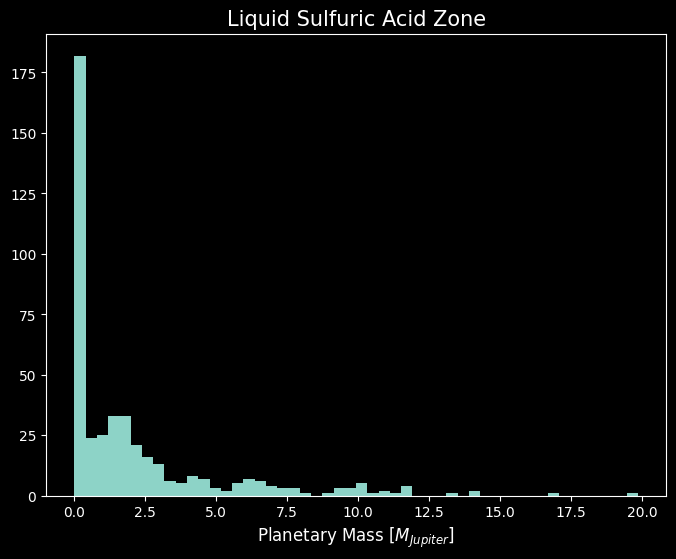

In [28]:
plt.figure(figsize=(8,6))
plt.hist(sf_good_df['MASS'], bins = 50)
plt.xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
plt.title('Liquid Sulfuric Acid Zone', fontsize=15)

Text(0.5, 1.0, 'Liquid Sulfuric Acid Zone')

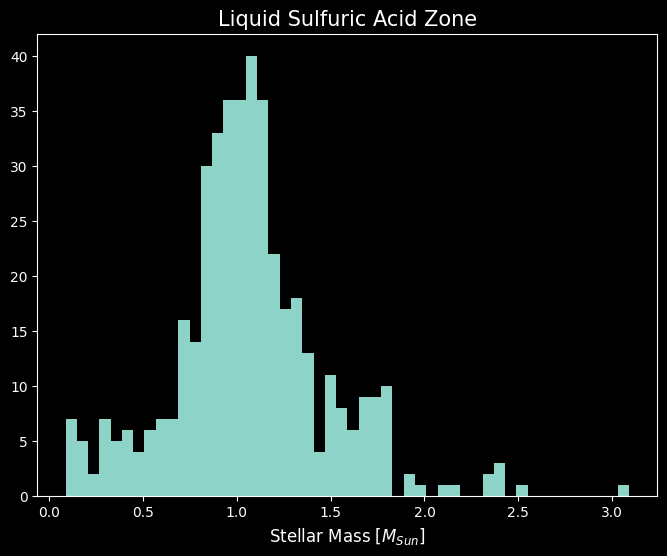

In [38]:
plt.figure(figsize=(8,6))
plt.hist(sf_good_df['MSTAR'], bins = 50)
plt.xlabel('Stellar Mass [$M_{Sun}$]', fontsize=12)
plt.title('Liquid Sulfuric Acid Zone', fontsize=15)

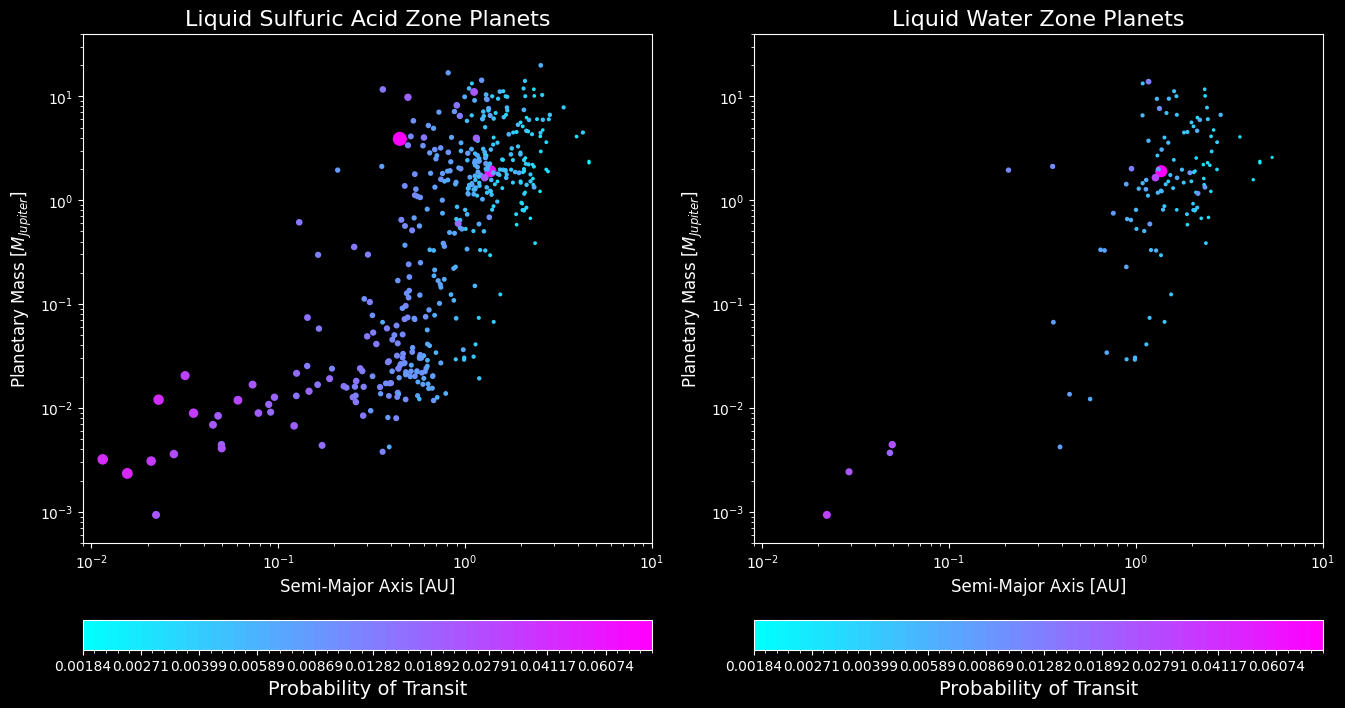

In [30]:
plt.figure(figsize=(16,8), dpi = 100)
cm = colormaps['cool']
ax1 = plt.subplot2grid((12, 21), (0,0), rowspan=10, colspan=10)
ax1.scatter(sf_good_df["A"], sf_good_df["MASS"], s=10**3*sf_good_df["Ptransit"],
            c=np.log10(sf_good_df["Ptransit"]), cmap = cm)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Semi-Major Axis [AU]', fontsize=12)
ax1.set_ylabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
ax1.set_title('Liquid Sulfuric Acid Zone Planets', fontsize=16)
ax1.set_xlim(9e-3, 1e1)
ax1.set_ylim(5e-4, 4e1)

ax3 = plt.subplot2grid((12, 21), (0,11), rowspan=10, colspan=10)
ax3.scatter(good_df["A"], good_df["MASS"], s=10**3*good_df["Ptransit"],
            c=np.log10(good_df["Ptransit"]), cmap = cm)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('Semi-Major Axis [AU]', fontsize=12)
ax3.set_ylabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
ax3.set_title('Liquid Water Zone Planets', fontsize=16)
ax3.set_xlim(9e-3, 1e1)
ax3.set_ylim(5e-4, 4e1)

ax2 = plt.subplot2grid((12, 21), (11, 0), rowspan=1, colspan=10)
minP = np.log10(sf_good_df["Ptransit"].min())
maxP = np.log10(sf_good_df["Ptransit"].max())
bounds = np.logspace(minP, maxP)
# set boundaries
N = len(sf_good_df["Ptransit"])
norm = mpl.colors.BoundaryNorm(bounds, cm.N)
cb = mpl.colorbar.Colorbar(ax2,
                            cmap=cm,
                            spacing='uniform',
                            orientation ='horizontal',
                            boundaries = bounds,
                            norm = norm)
ax2.set_xlabel('Probability of Transit', fontsize=14)

ax4 = plt.subplot2grid((12, 21), (11, 11), rowspan=1, colspan=10)
minP_ax4 = np.log10(good_df["Ptransit"].min())
maxP_ax4 = np.log10(good_df["Ptransit"].max())
bounds_ax4 = np.logspace(minP_ax4, maxP_ax4)
# set boundaries
N_ax4 = len(good_df["Ptransit"])
norm_ax4 = mpl.colors.BoundaryNorm(bounds, cm.N)
cb = mpl.colorbar.Colorbar(ax4,
                            cmap=cm,
                            spacing='uniform',
                            orientation ='horizontal',
                            boundaries = bounds_ax4,
                            norm = norm_ax4)
ax4.set_xlabel('Probability of Transit', fontsize=14)
plt.subplots_adjust(wspace=2, hspace=0.8)

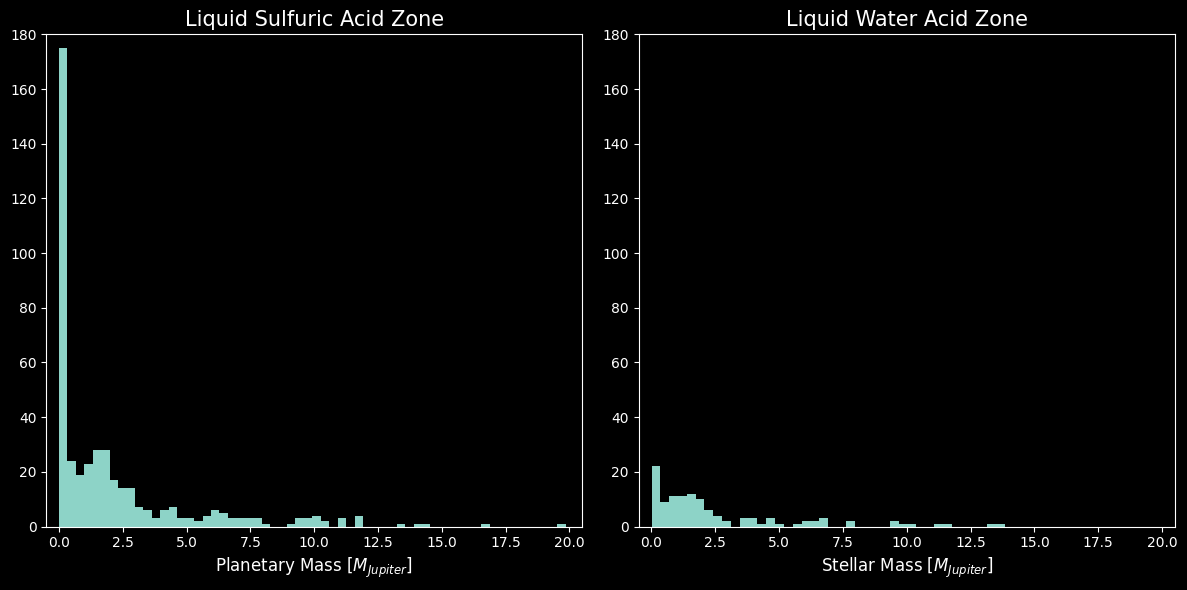

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
ax1.hist(sf_good_df['MASS'], bins = 60)
ax1.set_xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=12)
ax1.set_title('Liquid Sulfuric Acid Zone', fontsize=15)
ax1.set_xlim(-0.5, 20.5)
ax1.set_ylim(0, 180)

ax2.hist(good_df['MASS'], bins = 40)
ax2.set_xlabel('Stellar Mass [$M_{Jupiter}$]', fontsize=12)
ax2.set_title('Liquid Water Acid Zone', fontsize=15)
ax2.set_xlim(-0.5, 20.5)
ax2.set_ylim(0, 180)

plt.tight_layout()

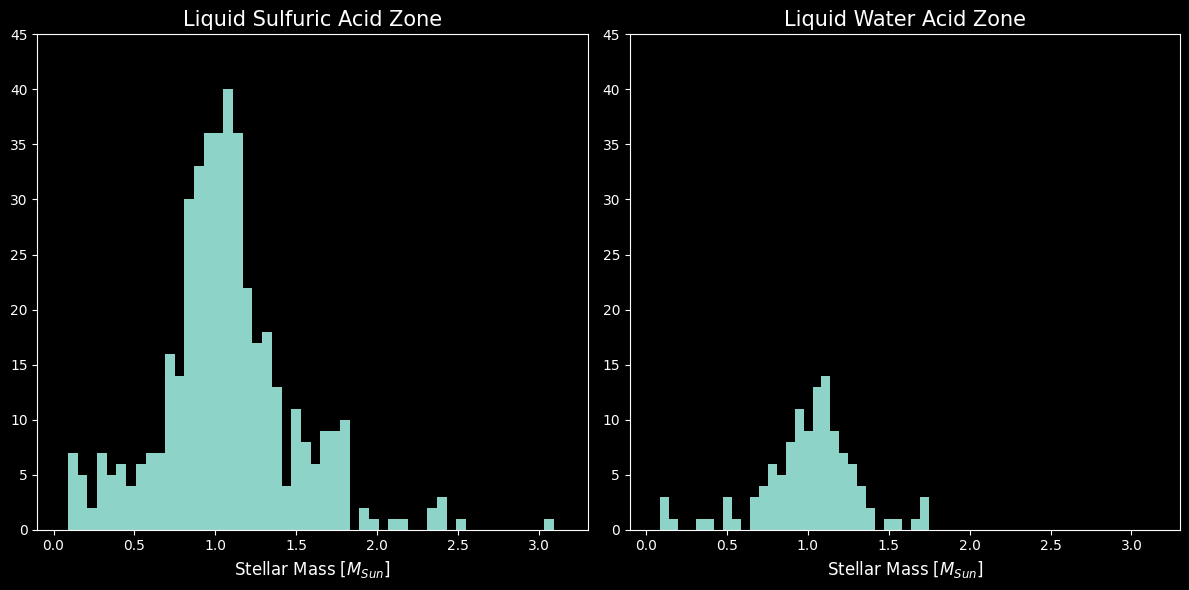

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
ax1.hist(sf_good_df['MSTAR'], bins = 50)
ax1.set_xlabel('Stellar Mass [$M_{Sun}$]', fontsize=12)
ax1.set_title('Liquid Sulfuric Acid Zone', fontsize=15)
ax1.set_xlim(-0.1, 3.3)
ax1.set_ylim(0, 45)

ax2.hist(good_df['MSTAR'], bins = 30)
ax2.set_xlabel('Stellar Mass [$M_{Sun}$]', fontsize=12)
ax2.set_title('Liquid Water Acid Zone', fontsize=15)
ax2.set_xlim(-0.1, 3.3)
ax2.set_ylim(0, 45)

plt.tight_layout()